In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
%matplotlib inline

In [17]:
labname = 'Gagnon Lab'
CURRENT_DATE = 'December 2024' # GLOBAL variable - used later

In [20]:
dates = pd.read_csv('gagnon.csv')
dates.head(50)

,f_name,l_name,start,end,position
0,James,Gagnon,January 2018,NaN,PI
1,Marissa,Higbee,February 2018,December 2018,undergrad
2,Evan,Drage,March 2018,July 2020,tech
3,Meredith,Liddiard,March 2018,July 2019,undergrad
4,Paige,Takasugi,March 2018,June 2020,undergrad
5,Kimberly,Truong,June 2018,April 2022,gradstudent
6,Nathan,Baker,January 2019,July 2022,tech
7,Marlen,Rice,August 2018,November 2018,rotation
8,Marlen,Rice,April 2019,November 2023,gradstudent
9,Andy,Sposato,August 2018,November 2018,rotation


In [21]:
def convert_to_num(date): 
    
    months = {
        'January' : 0,
        'February': 1,
        'March' : 2, 
        'April' : 3,
        'May' : 4,
        'June' : 5,
        'July' : 6,
        'August' : 7, 
        'September' : 8,
        'October' : 9,
        'November' : 10, 
        'December' : 11,
    }
    
    if type(date) == str: 
        date = date.split(' ')
        if int(date[1]) != 2017: 
            return (12 * (int(date[1])-2018)) + months[date[0]] + 0
        else: 
            return months[date[0]] - 11
    else: 
        return convert_to_num(CURRENT_DATE)
    
dates['start_num'] = np.vectorize(convert_to_num)(dates['start'])
dates['end_num'] = np.vectorize(convert_to_num)(dates['end'])
dates['total_time'] = dates['end_num'] - dates['start_num']


dates.head(6)

,f_name,l_name,start,end,position,start_num,end_num,total_time
0,James,Gagnon,January 2018,NaN,PI,0,83,83
1,Marissa,Higbee,February 2018,December 2018,undergrad,1,11,10
2,Evan,Drage,March 2018,July 2020,tech,2,30,28
3,Meredith,Liddiard,March 2018,July 2019,undergrad,2,18,16
4,Paige,Takasugi,March 2018,June 2020,undergrad,2,29,27
5,Kimberly,Truong,June 2018,April 2022,gradstudent,5,51,46


In [33]:
# assign general categories to each
def give_rank(position): 
    juniors = ['undergrad', 'rotation', 'tech', 'RA']
    if position in juniors: 
        return 'junior'
    else: 
        return 'senior'

dates['rank'] = np.vectorize(give_rank)(dates['position'])
dates = dates.sort_values('total_time', ascending=False).reset_index(drop=True)
dates.head(14)

,f_name,l_name,start,end,position,start_num,end_num,total_time,rank,ycoord,color
0,James,Gagnon,January 2018,NaN,PI,0,83,83,senior,2,#1E8449
1,Andy,Sposato,April 2019,November 2024,gradstudent,15,82,67,senior,4,#130DB0
2,Clay,Carey,November 2019,NaN,postdoc,22,83,61,senior,6,#8010BF
3,Sheng,Wang,March 2020,NaN,gradstudent,26,83,57,senior,8,#130DB0
4,Marlen,Rice,April 2019,November 2023,gradstudent,15,70,55,senior,10,#130DB0
5,Sahar,Kanishka,January 2019,May 2023,undergrad,12,64,52,junior,-2,#C90E0E
6,Mai,Tran,October 2019,September 2023,postdoc,21,68,47,senior,12,#8010BF
7,Kimberly,Truong,June 2018,April 2022,gradstudent,5,51,46,senior,14,#130DB0
8,Alexis,Schmid,March 2021,NaN,gradstudent,38,83,45,senior,16,#130DB0
9,Darren,Llewellyn,August 2019,May 2023,undergrad,19,64,45,junior,-4,#C90E0E


In [34]:
max_months = dates['end_num'].max()
max_seniors = dates['rank'].value_counts()['senior']
max_juniors = dates['rank'].value_counts()['junior']

seniors_array = [[1 for x in range(max_months)] for n in range(max_seniors)]
juniors_array = [[1 for x in range(max_months)] for n in range(max_juniors)]

y_coords = []

def get_y(row, array): 
    """Given a row that has a start number and end number, 
    find the first index where it fits into the array"""
    
    y=0
    placed = False
    
    while not placed: 
        
        if row['start_num'] - 1 >= 0: 
            start = row['start_num'] - 1 
        else: 
            start = row['start_num']
        if row['end_num'] + 1 <= len(array[0]):
            end = row['end_num'] + 1
        else: 
            end = row['end_num']
            
        if all(x for x in array[y][start:end]):
            for i in range(start, end): 
                array[y][i] = 0
            placed = True
        else: 
            y += 1
        
            
    return y, array
    
for idx in range(len(dates)):
    row = dates.iloc[idx]
    if row['rank'] == 'junior':
        y, juniors_array = get_y(row, juniors_array)
        y_coords.append(((y+1)*-1))
    else:
        y, seniors_array = get_y(row, seniors_array)
        y_coords.append((y+1))

dates['ycoord'] = pd.Series(y_coords)
dates.head(6)

,f_name,l_name,start,end,position,start_num,end_num,total_time,rank,ycoord,color
0,James,Gagnon,January 2018,NaN,PI,0,83,83,senior,1,#1E8449
1,Andy,Sposato,April 2019,November 2024,gradstudent,15,82,67,senior,2,#130DB0
2,Clay,Carey,November 2019,NaN,postdoc,22,83,61,senior,3,#8010BF
3,Sheng,Wang,March 2020,NaN,gradstudent,26,83,57,senior,4,#130DB0
4,Marlen,Rice,April 2019,November 2023,gradstudent,15,70,55,senior,5,#130DB0
5,Sahar,Kanishka,January 2019,May 2023,undergrad,12,64,52,junior,-1,#C90E0E


In [35]:
# assign colors
def assign_colors(position):
    colors = {
        'undergrad' : '#C90E0E',
        'tech' : '#F1C40F',
        'gradstudent' : '#130DB0',
        'RA' : '#E67E22',
        'rotation' : '#3498DB',
        'postdoc' : '#8010BF',
        'PI' : '#1E8449',
    }
    return colors[position]

dates['color'] = np.vectorize(assign_colors)(dates['position'])
dates['ycoord'] = dates['ycoord'] * 2
dates.head(27)

,f_name,l_name,start,end,position,start_num,end_num,total_time,rank,ycoord,color
0,James,Gagnon,January 2018,NaN,PI,0,83,83,senior,2,#1E8449
1,Andy,Sposato,April 2019,November 2024,gradstudent,15,82,67,senior,4,#130DB0
2,Clay,Carey,November 2019,NaN,postdoc,22,83,61,senior,6,#8010BF
3,Sheng,Wang,March 2020,NaN,gradstudent,26,83,57,senior,8,#130DB0
4,Marlen,Rice,April 2019,November 2023,gradstudent,15,70,55,senior,10,#130DB0
5,Sahar,Kanishka,January 2019,May 2023,undergrad,12,64,52,junior,-2,#C90E0E
6,Mai,Tran,October 2019,September 2023,postdoc,21,68,47,senior,12,#8010BF
7,Kimberly,Truong,June 2018,April 2022,gradstudent,5,51,46,senior,14,#130DB0
8,Alexis,Schmid,March 2021,NaN,gradstudent,38,83,45,senior,16,#130DB0
9,Darren,Llewellyn,August 2019,May 2023,undergrad,19,64,45,junior,-4,#C90E0E


The default for this code is to choose a y coordinate for each person based on availability of the current row. I want to cheat this so I can maintain a single individual with two positions on the same y coordinate. For example, a rotation student becoming a grad student - I would want both line segments to be at the same vertical position. 

To work around this, I download the data as a new csv. I'm keeping the name 'dates'

In [37]:
dates.to_csv('dates.csv', index = False)

Now, the dates.csv file is in the same location as the input csv. I make manual changes to it in Excel, and reopen the file in the next cell. Ta da!

In [78]:
dates = pd.read_csv('dates_adjusted.csv')

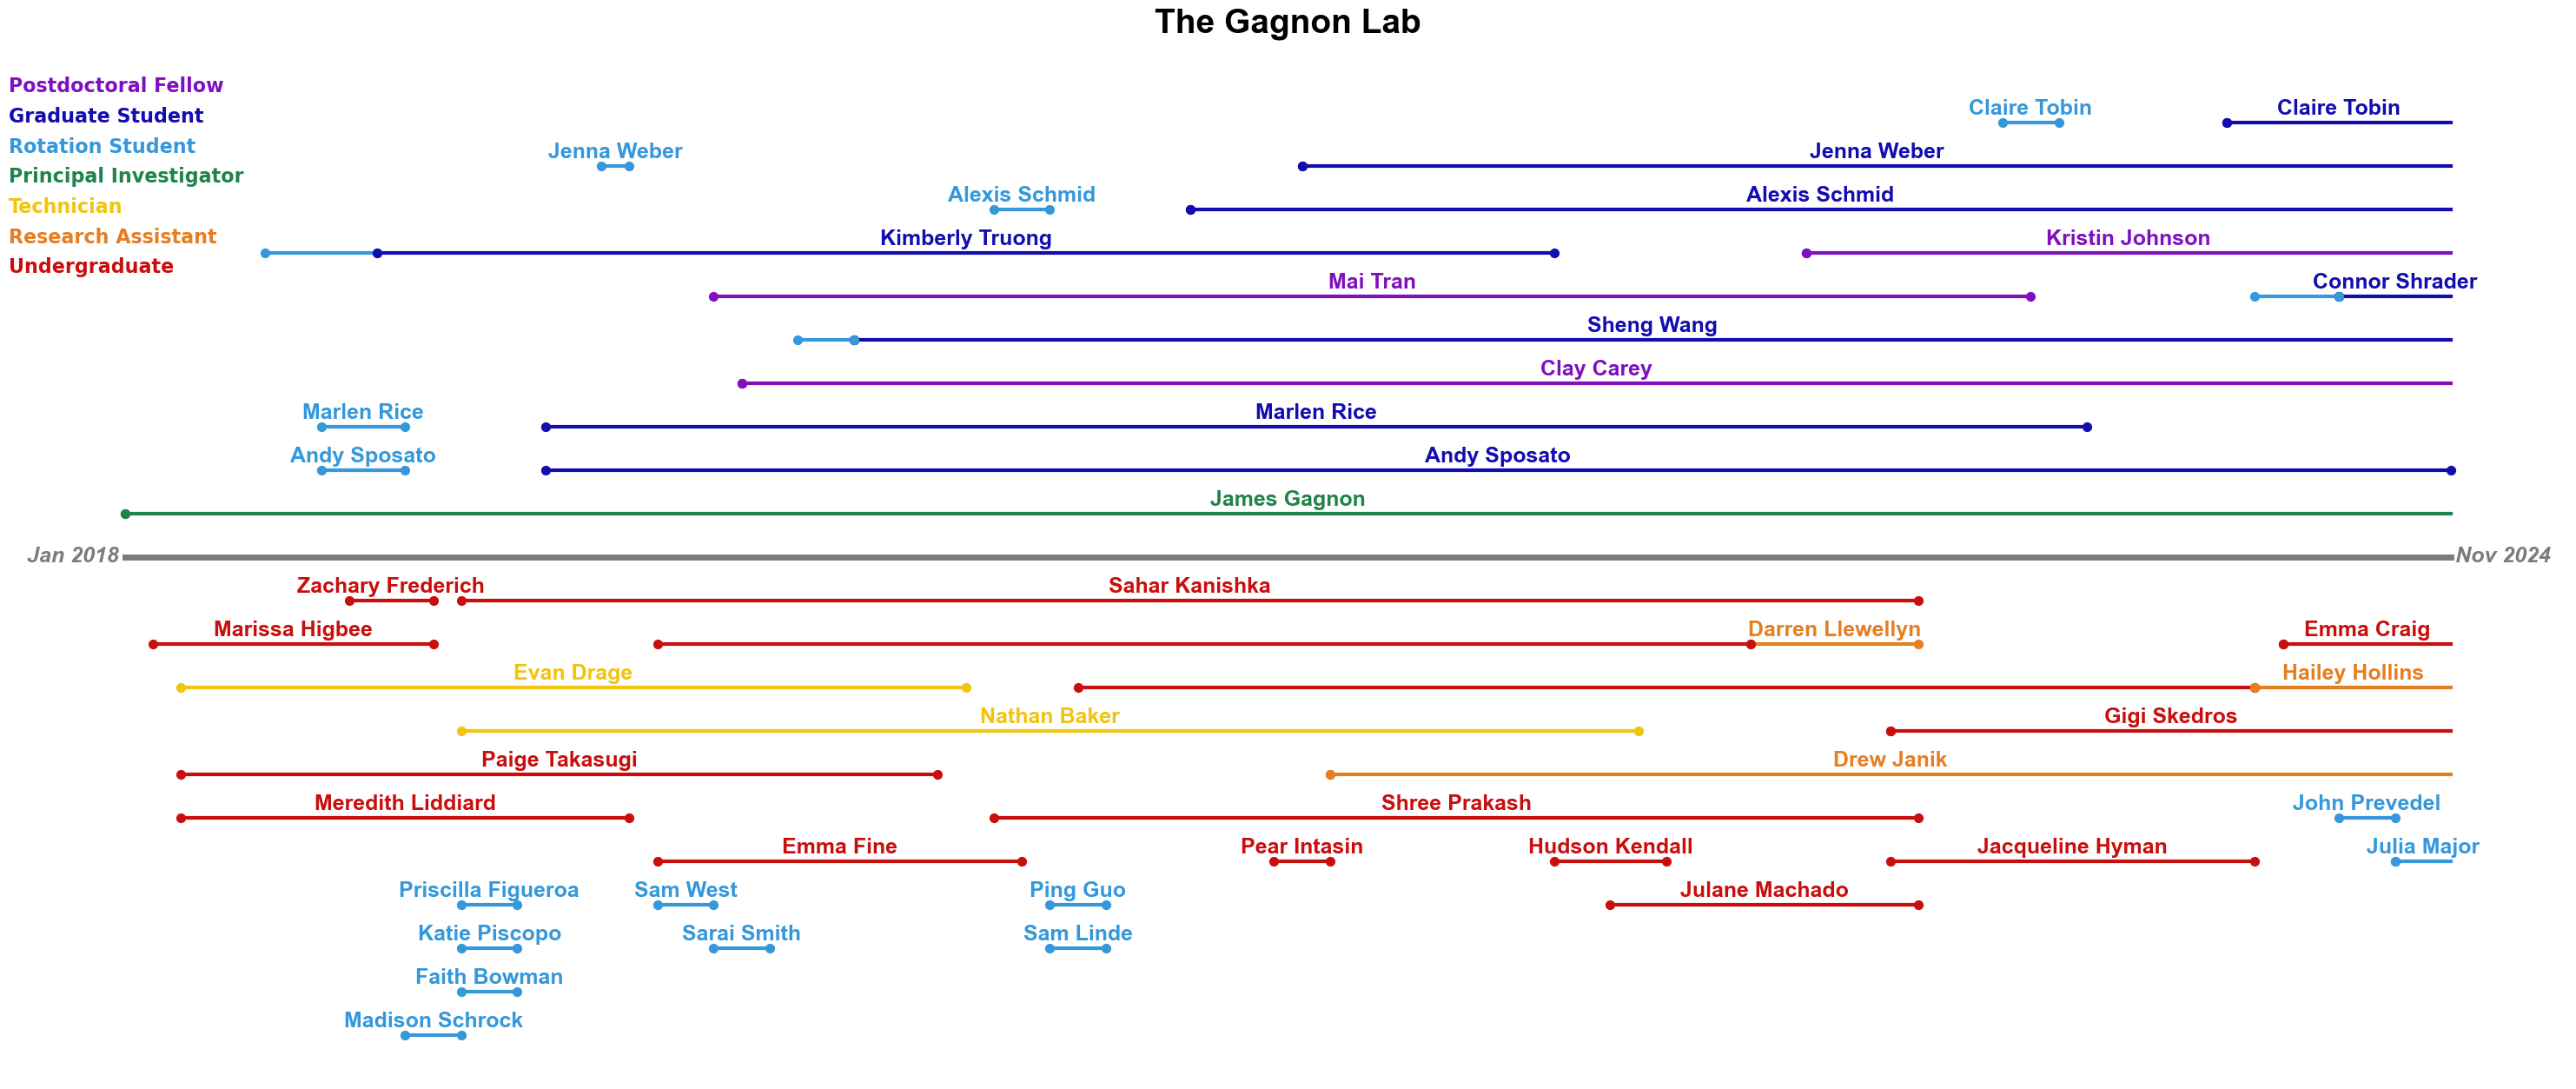

In [88]:
plt.rcParams['figure.figsize'] = (38, 15)

fig,ax = plt.subplots()
ax.plot((0,max_months), (0,0), color = '#797D7F', linewidth=5.0)
ax.text(-1.85, 0, 'Jan 2018', horizontalalignment='center', verticalalignment='center', 
        fontsize = 18, fontname = 'Arial', fontstyle = 'italic', color = '#797D7F', fontweight = 'bold')
ax.text(max_months +1.85, 0, 'Nov 2024', horizontalalignment='center', verticalalignment='center', 
        fontsize = 18, fontname = 'Arial', fontstyle = 'italic', color = '#797D7F', fontweight = 'bold')


# csfont = {'fontname':'Comic Sans MS'}
titlefont = {'fontname':'Arial'}
namefont = {'fontname':'Arial'}

# for each entry plot these things
for idx in range(len(dates)):
    row = dates.iloc[idx]
    
    # line
    ax.plot((row['start_num'],row['end_num']), 
             (row['ycoord'], row['ycoord']), 
             color=row['color'],
             linewidth=3.0,
             zorder=0)
    
    # end points
    ax.scatter(row['start_num'], row['ycoord'], color=row['color'], s=50, zorder=2)
    if not pd.isnull(row['end']):
        ax.scatter(row['end_num'], row['ycoord'], color=row['color'], s=50, zorder=2)
    else:
        ax.scatter(row['start_num'], row['ycoord'], color=row['color'], s=50, zorder=2)
        
    
    # text
    mid = row['start_num'] + ((row['end_num'] - row['start_num']) / 2)
    ax.text(mid, row['ycoord']+.6, row['f_name'] + ' ' + row['l_name'], 
         color=row['color'], 
         horizontalalignment='center', verticalalignment='center',
         fontsize=18,
         fontweight = 'bold',
         zorder=3,
         **namefont)

# legend 
props = dict(boxstyle='square', alpha=0.5, color = "white")
ax.text(0, 1, 'Postdoctoral Fellow', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#8010BF', fontweight = 'bold')
ax.text(0, .97, 'Graduate Student', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#130DB0', fontweight = 'bold')
ax.text(0, .94, 'Rotation Student', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#3498DB', fontweight = 'bold')
ax.text(0, .91, 'Principal Investigator', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#1E8449', fontweight = 'bold')
ax.text(0, .88, 'Technician', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#F1C40F', fontweight = 'bold')
ax.text(0, .85, 'Research Assistant', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#E67E22', fontweight = 'bold')
ax.text(0, .82, 'Undergraduate', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#C90E0E', fontweight = 'bold')
# ax.text(0, .68, 'High School Student', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#AEAEAE', fontweight = 'bold')
# ready to use when high school student joins
#ax.text(0, .68, 'High School Student', transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props, color = '#FC5BD7', fontweight = 'bold')

ax.set_title('The Gagnon Lab\n', fontsize = 28, **titlefont, color='black', fontweight = 'bold') 
ax.axis('off')
plt.savefig(labname + ' ' + CURRENT_DATE + '.PNG')
plt.show()